In [30]:
import numpy as np
import astropy.constants as const
import pylab as plt
from astropy.modeling import models
from astropy import units as u
from astropy.visualization import quantity_support

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

import sys
sys.setrecursionlimit(10000)

# Functions

In [23]:
#return the maximum mass as a function of the age of the stellar population
def max_mass(t, M_sun):
    t_sun = 1e10 * u.yr #10 Gy
    return M_sun * (t_sun / t).value**0.5

In [24]:
#scale factor and temperature
def scale_and_temperature(M, M_sun):
    L_sun = const.L_sun.cgs.value
    R_sun = const.R_sun.cgs.value
    sigma = const.sigma_sb.cgs.value
    
    if (M >= 1.3* M_sun): 
        n = 18 #cno cycle
    else:
        n = 4 #pp chain
        
    R = M**((n - 1) / (n + 3))
    scale_factor = R**2 * M**(-2.35)
    
    T = (L_sun / (4 * np.pi * R_sun**2 * sigma))**(1/4) * (M / M_sun)**((n + 11) / (4*n + 12))
    #T = (L_sun / (4 * np.pi * R_sun**2 * sigma))**(1/4) * (M / M_sun)**((n + 5) / (2*n + 6))
    return scale_factor, T

# Main

In [32]:
#masses
age = 1e6 * u.yr  #age of the distribution
M_sun = const.M_sun.cgs.value
M_min = 0.1 * M_sun
M_max = max_mass(age, M_sun)
M_array = np.linspace(M_min, M_max, int(10*M_max / M_sun))

#wavelenght array
wave = np.linspace(3000, 8000, 100) * u.AA

In [33]:
#fill the scale factor and temperature arrays
scale_factor_array = np.empty_like(M_array)
temp_array = np.empty_like(M_array)

for i in range(len(M_array)):
    scale_factor_array[i], temp_array[i] = scale_and_temperature(M_array[i], M_sun)

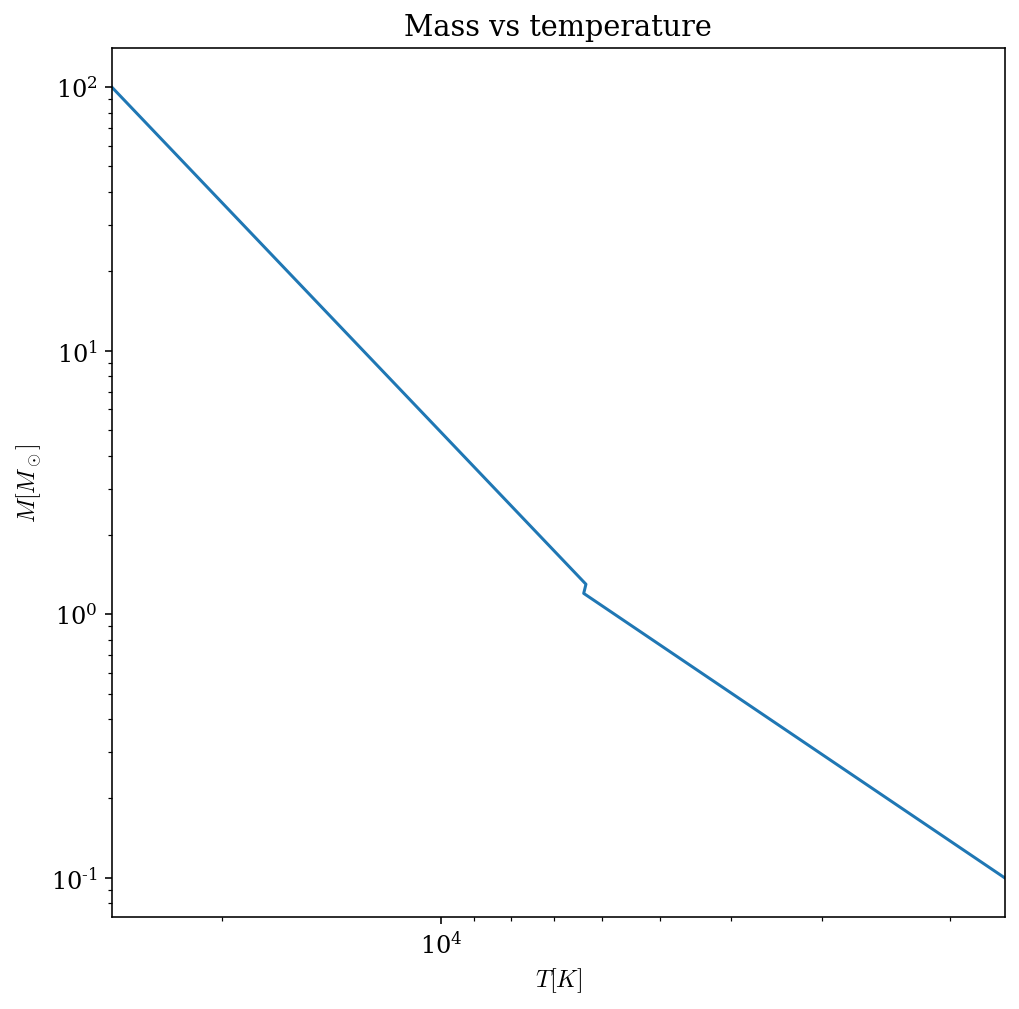

In [34]:
plt.plot(temp_array, M_array / M_sun)
plt.ylabel("$M [M_\odot]$")
plt.xlabel("$T [K]$")
plt.title("Mass vs temperature")
#plt.xscale("log")
plt.xlim(max(temp_array), min(temp_array))
plt.loglog()
plt.show()

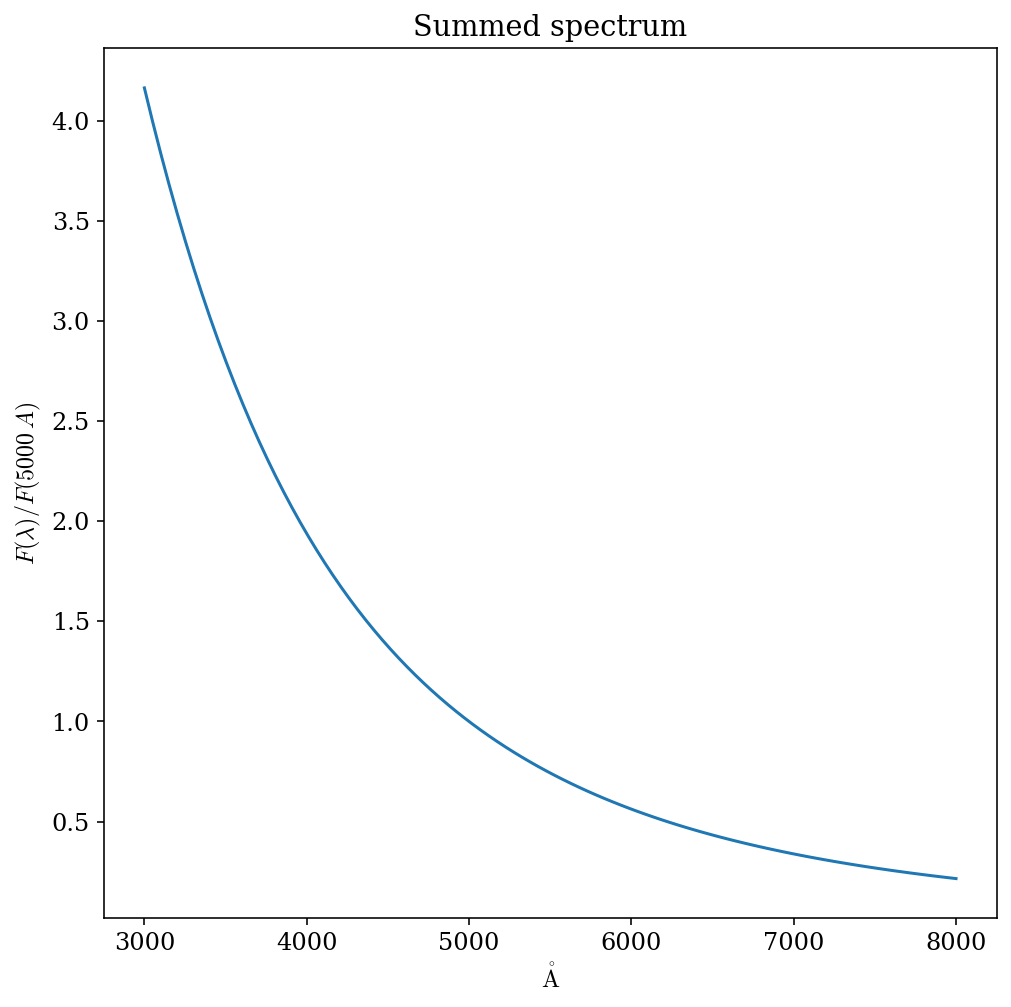

In [35]:
bb = models.BlackBody(temperature = temp_array[0] * u.K, scale = scale_factor_array[0] * u.erg / (u.cm**2 * u.AA * u.s * u.sr))
for i in range(1, len(M_array)):
    bb += models.BlackBody(temperature = temp_array[i] * u.K, scale = scale_factor_array[i] * u.erg / (u.cm**2 * u.AA * u.s * u.sr))
    
flux = bb(wave)
with quantity_support():
    plt.figure()
    #plt.semilogx(wave, flux / bb(5000 * u.AA)) #normalize to F(5000 A)
    plt.plot(wave, flux / bb(5000 * u.AA)) #normalize to F(5000 A)
    plt.ylabel("$F(\lambda) / F(5000 \, A)$")
    plt.title("Summed spectrum")
    plt.show()

## incorrect?